# E-box project
SWBio Data Science & Machine Learning Assessment.

## 1. Read in fasta files
Utilising code from Matt William's Biopython Course (1).

In [1]:
from Bio import SeqIO # Import Seq10 package from Biopython

Per1 = SeqIO.read("Per1.fasta", "fasta") # Read in fasta file using Seq10.read() method
print(Per1) # Look at Per1 gene's SeqRecords

ID: NC_000077.7:68985934-69000791
Name: NC_000077.7:68985934-69000791
Description: NC_000077.7:68985934-69000791 Mus musculus strain C57BL/6J chromosome 11, GRCm39
Number of features: 0
Seq('GAAAATGACTGAGTTCTGAAATGCCAATGGTTGCTTTACAAGGGCTTGCCGGCT...CAA')


In [2]:
Per1_seq = Per1.seq # If you want just the sequence from this record use .seq
print(Per1_seq[0:20]) # Lets check that worked & print the first 20 nucleotides

GAAAATGACTGAGTTCTGAA


## 2. Search for an E-Box element in a gene sequence

### 2.1 Count the number of E-boxes (or lack of E-boxes!)
Use the Biopython count() method to search for subsequences within a sequence. This method returns the number of times a subsequence is found. The following code will use mouse Per1 gene as an example.

In [3]:
Per1_seq.count("CACGTG") # Look for ebox sequence (CACGTG) in Per1 gene sequence

4

### 2.2 Create an E-box counter function
Create a function that can take the name of any fasta file (in the depository) as an argument and return the number of E-boxes within that sequence.

In [4]:
# Create a function requiring an argument (the fasta filename of the gene of interest)
def eboxcounter(filename): 
    gene = SeqIO.read(filename, "fasta") # Read in file using seq10.read() method
    n = gene.seq.count("CACGTG") # Count number of canonical eboxes present using seq.count()
    
    return n # Use return rather than print in order to use than number in further code

In [5]:
x = eboxcounter("Per1.fasta") # Put gene of interest filename here

if x >= 1: # If number of eboxes found is more than or equal to one...
    print("The number of eboxes in this gene is:", x) # print out the number of eboxes in that gene
else: 
    print("No eboxes found in this sequence") # else print that there no eboxes found

The number of eboxes in this gene is: 4


### 2.3 If present, what are the positions of these E-boxes?
Using the ntsearch() function determine the positions within the sequence in which the eboxes are present. 

Note
* This function returns the position of the first nucleotide within the sequence e.g. for "CACGTG" the "C"
* It requires the sequences to be in a string data type
* The position values returned use 0-based indexing 

In [6]:
# Utilising nt_search() function which takes the arguments (sequence, subsequence)
import Bio.SeqUtils # Import relevant package
ebox = "CACGTG" # Subsequence searching for

x = Bio.SeqUtils.nt_search(str(Per1_seq), ebox) 
print(x) # Print the positions

['CACGTG', 2566, 3312, 3675, 5855]


In [7]:
print(Per1_seq[2566:2572]) # Lets check how this did!

CACGTG


Alternatively, to get around python 0-indexing you can adapt Lana Caldarevic's find motif code (2). This uses a for loop to run through the sequence one nucleotide at a time looking for a position in the sequence that starts with "CACGTG". 

In [8]:
s = Per1_seq # Input gene of interest here
ebox = "CACGTG" # Searching for

for position in range(len(s)): # range() function + len() function = a number range the length of the string
    if s[position:].startswith(ebox): # Does that position start with "CACGTG"? 
        print(position+1) # If so print and add 1 (due to 0-based indexing)

2567
3313
3676
5856


### 2.4 Create an E-box position function
Create a function taking  a fasta file name as an argument and returning the position of any E-boxes present.

In [9]:
# Create function requiring an argument (the fasta filename of the gene of interest)
def eboxposition(filename): 
    gene = SeqIO.read(filename, "fasta") # Read in file using seq10
    s = gene.seq # Take the sequence of that file
    ebox = "CACGTG"
    x = Bio.SeqUtils.nt_search(str(s), ebox)  # Search sequence for ebox
    return x

In [10]:
eboxposition("Per1.fasta") # Put gene of interest filename here

['CACGTG', 2566, 3312, 3675, 5855]

## 3. Research Questions
* E-boxes can be found in both intronic and promoter regions of a gene. Do you find more E-boxes if you include the promoter region of the Per1 gene?
* So far only Per1 gene has been looked at, what about some other genes?
* What if E-boxes don't always look like that?

### 3.1 Compare number of E-boxes when Per1 gene file includes its promoter region

In [11]:
filelist = ["Per1.fasta", "Per1wProm.fasta"]

for file in filelist: #for loop to go through list of genes of interest
    x = eboxcounter(file) #use eboxcounter() function 
    print(x)

4
6


### 3.2 Look at some other genes

In [12]:
filelist = ["Per1.fasta", "Per1wProm.fasta", "Nnat.fasta", "NnatwProm.fasta", "Penk.fasta", "PenkwProm.fasta", "Vgf.fasta", "VgfwProm.fasta"] #list of genes of interest

values = [] #empty list to put ebox counts into

for file in filelist: #for loop to run through file list
    x = eboxcounter(file) #use eboxcounter function
    values.append(x) #add them to values list

print(values) #see values... but they're not easy to intepret on their own

[4, 6, 0, 0, 0, 0, 4, 4]


#### Make this into a dictionary:
The printed list of E-box values above is not easy to interpet alone (without their respective sequences their related to). So to make this easier and to allow for single genes to be picked out a dictionary can be used.

In [19]:
# Combine filelist and values using the zip() and dict() functions to create a dictionary
# Adapted code from Stack Overflow (3)
eboxdict = dict(zip(filelist, values)) 

print(eboxdict) #now values are next to their respective filenames

{'Per1.fasta': 4, 'Per1wProm.fasta': 6, 'Nnat.fasta': 0, 'NnatwProm.fasta': 0, 'Penk.fasta': 0, 'PenkwProm.fasta': 0, 'Vgf.fasta': 4, 'VgfwProm.fasta': 4}


In [14]:
# Use the dictionary to pull out ebox counts for specific gene e.g. Vgf
VgfEboxes = eboxdict["Vgf.fasta"]
print(VgfEboxes)

4


#### Alternatively make a dataframe:
To look at the data visually a dataframe may be more appropriate data storage.

In [15]:
import pandas as pd # Import pandas package

# Adapted code from Stack Overflow (4)
# It creates a list of tuples from the two lists via list(zip()), and uses this to create a dataframe
df = pd.DataFrame(list(zip(filelist,values)), columns=['Filename','Ebox Count'])
df

,Filename,Ebox Count
0,Per1.fasta,4
1,Per1wProm.fasta,6
2,Nnat.fasta,0
3,NnatwProm.fasta,0
4,Penk.fasta,0
5,PenkwProm.fasta,0
6,Vgf.fasta,4
7,VgfwProm.fasta,4


Plot the results on a horizontal bar plot:

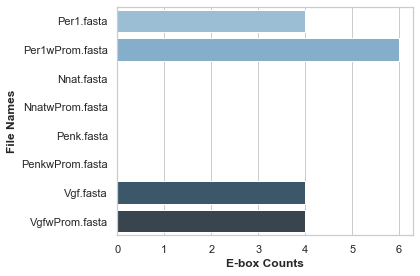

In [46]:
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Ebox Count", y="Filename", data=df, palette="Blues_d") #Create horizontal barplot with a blue palette
plt.ylabel('File Names', fontweight = 'bold') # set label for Y axis and make it bold
plt.xlabel('E-box Counts', fontweight = 'bold') #set label for X axis and make it bold
plt.tight_layout() # Ensure it all fits on the plot
plt.savefig('eboxplot.png', pad_inches=1) # Save the figure as a png image file

### 3.3 To look for imperfect ebox could use ntsearch() with N...
The ntsearch() method allows for the use of 'N' to signify an 'A' or 'T' or 'C' or 'G'. 

In [17]:
import Bio.SeqUtils # Import relevant package
eboxISH = "CACNTG" # Use "N" to signify any nucleotide could be present in that position

x = Bio.SeqUtils.nt_search(str(Per1_seq), eboxISH) 
print(x) # Note this gives the position with python 0-indexing

['CAC[GATC]TG', 532, 2566, 2630, 3219, 3312, 3675, 4703, 5855, 6743, 10530, 11054, 11237, 11468]


In [18]:
Per1_seq[532: 538] # Lets have a look

Seq('CACTTG')

## 4. References

1. Williams, M (n.d.) Biopython Course: SeqRecord objects [Source code]. https://milliams.com/courses/biopython/Input%20and%20Output.html
2. Caldarevic, L (2021) Find Motif [Source code]. https://github.com/0038lana/rosalind/blob/main/motif_dna/find_motif.ipynb
3. Hall, A (2015) Stack Overflow: How do I convert two lists into a dictionary? [Source code] https://stackoverflow.com/questions/209840/how-do-i-convert-two-lists-into-a-dictionary
4. Gupta, A (2017) Stack Overflow: Take multiple lists into dataframe [Source code] https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe